****
## JSON Exercise

Using data in file 'data/world_bank_projects.json':

1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [504]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## imports for JSON, Pandas

In [505]:
import json
import numpy as np
from pandas.io.json import json_normalize

In [507]:
# Read in JSON file (50 columns, 500 rows)

worldbank_df = pd.read_json('data/world_bank_projects.json', encoding='utf-8')
worldbank_df[:30]

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{u'$oid': u'52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{u'Percent': 46, u'Name': u'Regional integrati...","[{u'code': u'47', u'name': u'Regional integrat...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{u'$oid': u'52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{u'Percent': 50, u'Name': u'Participation and ...","[{u'code': u'57', u'name': u'Participation and...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{u'$oid': u'52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Export development...","[{u'code': u'45', u'name': u'Export developmen...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{u'$oid': u'52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{u'Percent': 100, u'Name': u'Social safety nets'}","[{u'code': u'54', u'name': u'Social safety net...",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{u'$oid': u'52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{u'Percent': 20, u'Name': u'Administrative and...","[{u'code': u'25', u'name': u'Administrative an...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,{u'$oid': u'52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{u'Percent': 100, u'Name': u'Climate change'}","[{u'code': u'81', u'name': u'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,{u'$oid': u'52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{u'Percent': 87, u'Name': u'Other rural develo...","[{u'code': u'79', u'name': u'Other rural devel...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,{u'$oid': u'52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"{u'Percent': 33, u'Name': u'Other accountabili...","[{u'code': u'29', u'name': u'Other accountabil...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


In [508]:
# 1: Countries with most projects: Top Ten 

topRecipients = worldbank_df['countryshortname'].value_counts()[:10]
topRecipients

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Bangladesh            12
Nepal                 12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64

In [509]:
# The following is messy because more than 1 theme<->code pair per cell in JSON pandas table

topthemes = worldbank_df['mjtheme_namecode'].value_counts()[:10]
topthemes

[{u'code': u'11', u'name': u'Environment and natural resources management'}, {u'code': u'11', u'name': u'Environment and natural resources management'}]                                                                                            12
[{u'code': u'8', u'name': u'Human development'}, {u'code': u'11', u'name': u''}]                                                                                                                                                                    11
[{u'code': u'8', u'name': u'Human development'}, {u'code': u'8', u'name': u'Human development'}]                                                                                                                                                     8
[{u'code': u'4', u'name': u'Financial and private sector development'}, {u'code': u'4', u'name': u'Financial and private sector development'}]                                                                                                       6
[{u'code': u

In [510]:
# Thus, I loaded in the JSON directly to normalize

data = json.load((open('data/world_bank_projects.json')))

In [511]:
# 2: Now, you can see each code/theme instance has it's own row, 
#    but there are empty theme names

topthemes = json_normalize(data, 'mjtheme_namecode', ['countryshortname', 
                                                      '_id']).set_index('code')
topthemes[:30]

,name,_id,countryshortname
code,,,
8,Human development,{u'$oid': u'52b213b38594d8a2be17c780'},Ethiopia
11,,{u'$oid': u'52b213b38594d8a2be17c780'},Ethiopia
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c781'},Tunisia
6,Social protection and risk management,{u'$oid': u'52b213b38594d8a2be17c781'},Tunisia
5,Trade and integration,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu
2,Public sector governance,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu
11,Environment and natural resources management,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu
6,Social protection and risk management,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu
7,Social dev/gender/inclusion,{u'$oid': u'52b213b38594d8a2be17c783'},"Yemen, Republic of"


In [512]:
# The JSON unicode values for null (literally u'') was screwing up my fillna() operation, 
# so I replace them with numpy NaN

topthemes['name'] = topthemes['name'].replace(u'', np.nan)
topthemes[:30]

,name,_id,countryshortname
code,,,
8,Human development,{u'$oid': u'52b213b38594d8a2be17c780'},Ethiopia
11,NaN,{u'$oid': u'52b213b38594d8a2be17c780'},Ethiopia
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c781'},Tunisia
6,Social protection and risk management,{u'$oid': u'52b213b38594d8a2be17c781'},Tunisia
5,Trade and integration,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu
2,Public sector governance,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu
11,Environment and natural resources management,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu
6,Social protection and risk management,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu
7,Social dev/gender/inclusion,{u'$oid': u'52b213b38594d8a2be17c783'},"Yemen, Republic of"


In [513]:
# Finally, Project Themes by total counts

topThemeCounts = topthemes.index.value_counts()
topThemeCounts

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
3      15
Name: code, dtype: int64

In [514]:
# Ranked Project Themes, indexed by code

count = 1
for x in topThemeCounts: 
    topThemeCounts[count-1] = count
    count += 1
topThemeCounts

11     1
10     2
8      3
2      4
6      5
4      6
7      7
5      8
9      9
1     10
3     11
Name: code, dtype: int64

In [515]:
# Add a row for Theme Rank


topthemes['rank'] = topThemeCounts[topthemes.index]
topthemes[:30]

,name,_id,countryshortname,rank
code,,,,
8,Human development,{u'$oid': u'52b213b38594d8a2be17c780'},Ethiopia,3
11,NaN,{u'$oid': u'52b213b38594d8a2be17c780'},Ethiopia,1
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c781'},Tunisia,10
6,Social protection and risk management,{u'$oid': u'52b213b38594d8a2be17c781'},Tunisia,5
5,Trade and integration,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu,8
2,Public sector governance,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu,4
11,Environment and natural resources management,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu,1
6,Social protection and risk management,{u'$oid': u'52b213b38594d8a2be17c782'},Tuvalu,5
7,Social dev/gender/inclusion,{u'$oid': u'52b213b38594d8a2be17c783'},"Yemen, Republic of",7


In [517]:
topthemes = topthemes.sort_index()
topthemes[:30]

,name,_id,countryshortname,rank
code,,,,
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c81f'},Sao Tome and Principe,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c91a'},Uruguay,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c919'},Colombia,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c919'},Colombia,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c915'},Tonga,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c8ad'},"Yemen, Republic of",10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c85c'},Lao People's Democratic Republic,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c85c'},Lao People's Democratic Republic,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c8eb'},Ukraine,10


In [518]:
# Here is the final topthemes DataFrame with all empty theme names 
# filled with proper code name

topthemes = topthemes.ffill()
topthemes[:][:30]

,name,_id,countryshortname,rank
code,,,,
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c81f'},Sao Tome and Principe,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c91a'},Uruguay,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c919'},Colombia,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c919'},Colombia,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c915'},Tonga,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c8ad'},"Yemen, Republic of",10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c85c'},Lao People's Democratic Republic,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c85c'},Lao People's Democratic Republic,10
1,Economic management,{u'$oid': u'52b213b38594d8a2be17c8eb'},Ukraine,10


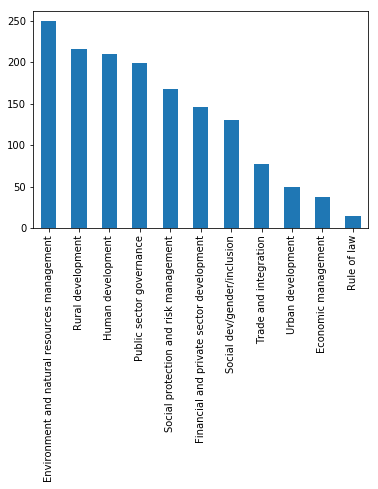

In [519]:
# Top themes, plotted:

topthemes['name'].value_counts().plot(kind='bar')
plt.show()

In [520]:
# Just for kicks, here is a dict with code numbers and corresponding themes

newcodes = topthemes.name.unique()
codesnumbers = topthemes.index.unique()

Themes = {}
count = 0
for code in codesnumbers:
    Themes[code] = newcodes[count]
    count += 1
Themes

{u'1': u'Economic management',
 u'10': u'Rural development',
 u'11': u'Environment and natural resources management',
 u'2': u'Public sector governance',
 u'3': u'Rule of law',
 u'4': u'Financial and private sector development',
 u'5': u'Trade and integration',
 u'6': u'Social protection and risk management',
 u'7': u'Social dev/gender/inclusion',
 u'8': u'Human development',
 u'9': u'Urban development'}

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [370]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [371]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [372]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [373]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [374]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
